# <center> Heart Disease Prediction Using SVM

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
from google.colab import files

uploaded = files.upload()

Saving heart 2.csv to heart 2.csv


# Loading the data

In [23]:
#Loading the CSV file
df = pd.read_csv('heart 2.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [24]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [25]:
#Exploring the data
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (918, 12)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
********

In [26]:
#Extracting the categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes =='O']

<ipython-input-27-9989e26432c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['RestingECG'], data = df, palette='husl', ax=axes[0,0])
<ipython-input-27-9989e26432c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['ChestPainType'], data = df, palette='husl', ax=axes[0,1])
<ipython-input-27-9989e26432c2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['ExerciseAngina'], data = df, palette='husl', ax=axes[1,0])
<ipython-input-27-9989e26432c2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is depre

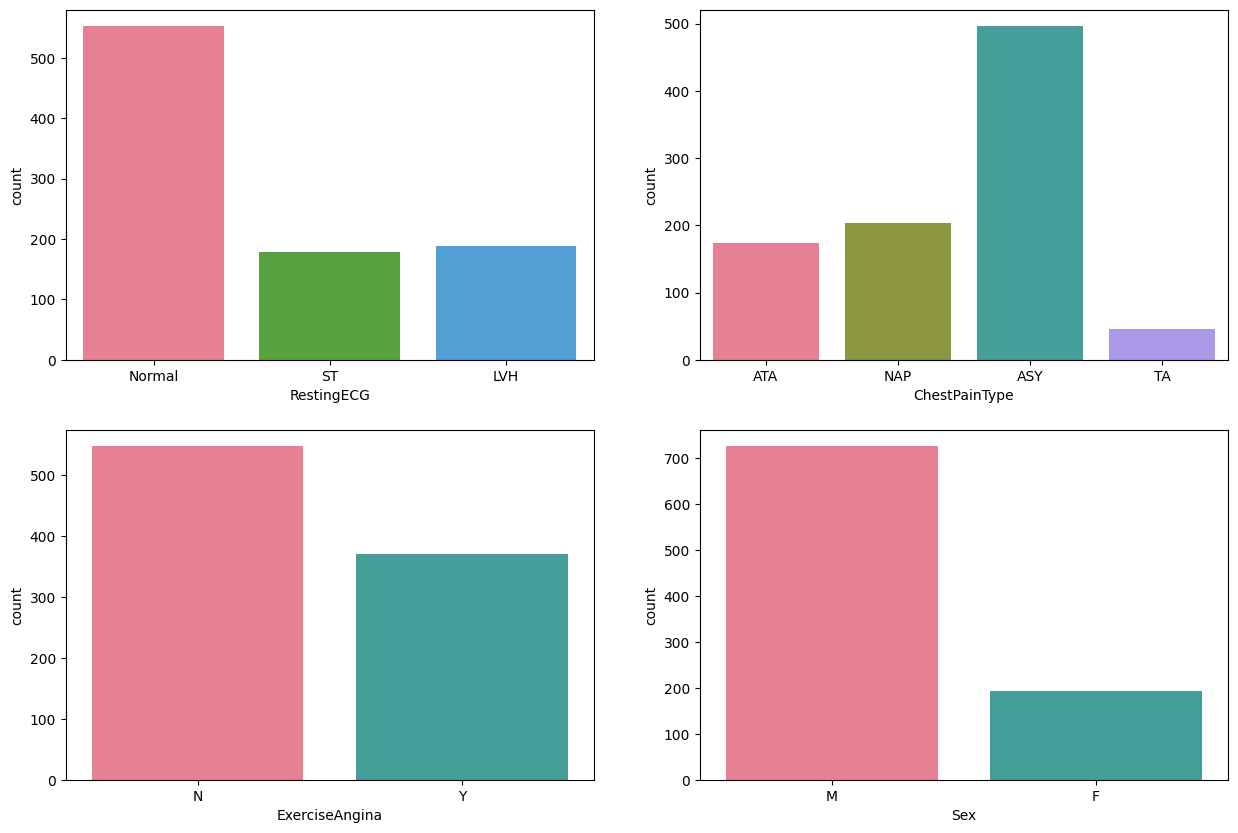

In [27]:
#Plotting the categorical variables on the target
fig, axes = plt.subplots(2, 2, figsize=(15,10))

#sns.countplot(x = df['HeartDisease'], data = df, palette='husl', ax=axes[0,0])
sns.countplot(x = df['RestingECG'], data = df, palette='husl', ax=axes[0,0])
sns.countplot(x = df['ChestPainType'], data = df, palette='husl', ax=axes[0,1])

sns.countplot(x = df['ExerciseAngina'], data = df, palette='husl', ax=axes[1,0])
sns.countplot(x = df['Sex'], data = df, palette='husl', ax=axes[1,1])
plt.show()

In [28]:
#Extracting the numerical columns
num_col = [feature for feature in df.columns if df[feature].dtypes != 'O']

<ipython-input-29-3a657f82f3be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

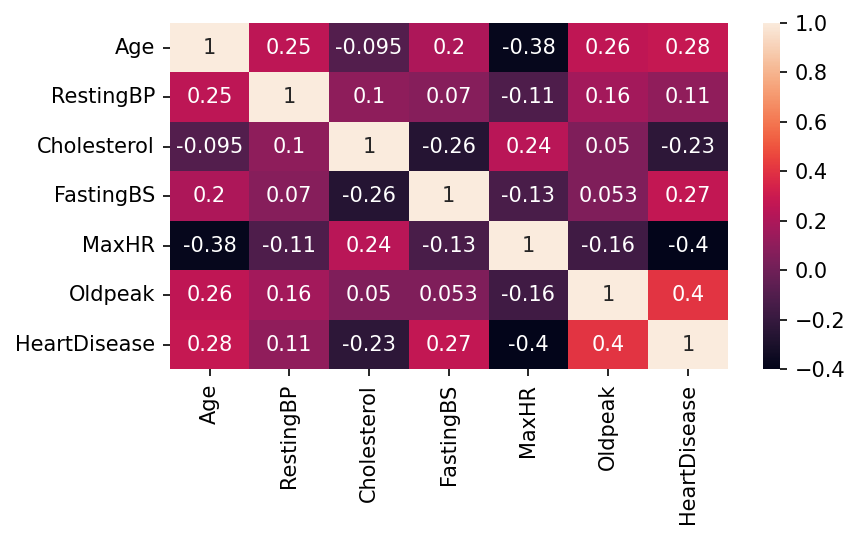

In [29]:
#Plotting a heatmap on the correlation values
plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [31]:
#Finding the best correlation with the 'HeartDisease' column
df.corr()['HeartDisease'].sort_values(ascending=False)

<ipython-input-31-8d20498bc7b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['HeartDisease'].sort_values(ascending=False)


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

## Plotting the distributions of the numerical variables

<ipython-input-32-af37bad7b9fc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['HeartDisease'],color=np.random.choice(color_plot), ax=ax[0][0], shade=True)
<ipython-input-32-af37bad7b9fc>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Oldpeak'],color=np.random.choice(color_plot), ax=ax[0][1], shade=True)
<ipython-input-32-af37bad7b9fc>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'],color=np.random.choice(color_plot), ax=ax[1][0], shade=True)
<ipython-input-32-af37bad7b9fc>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.

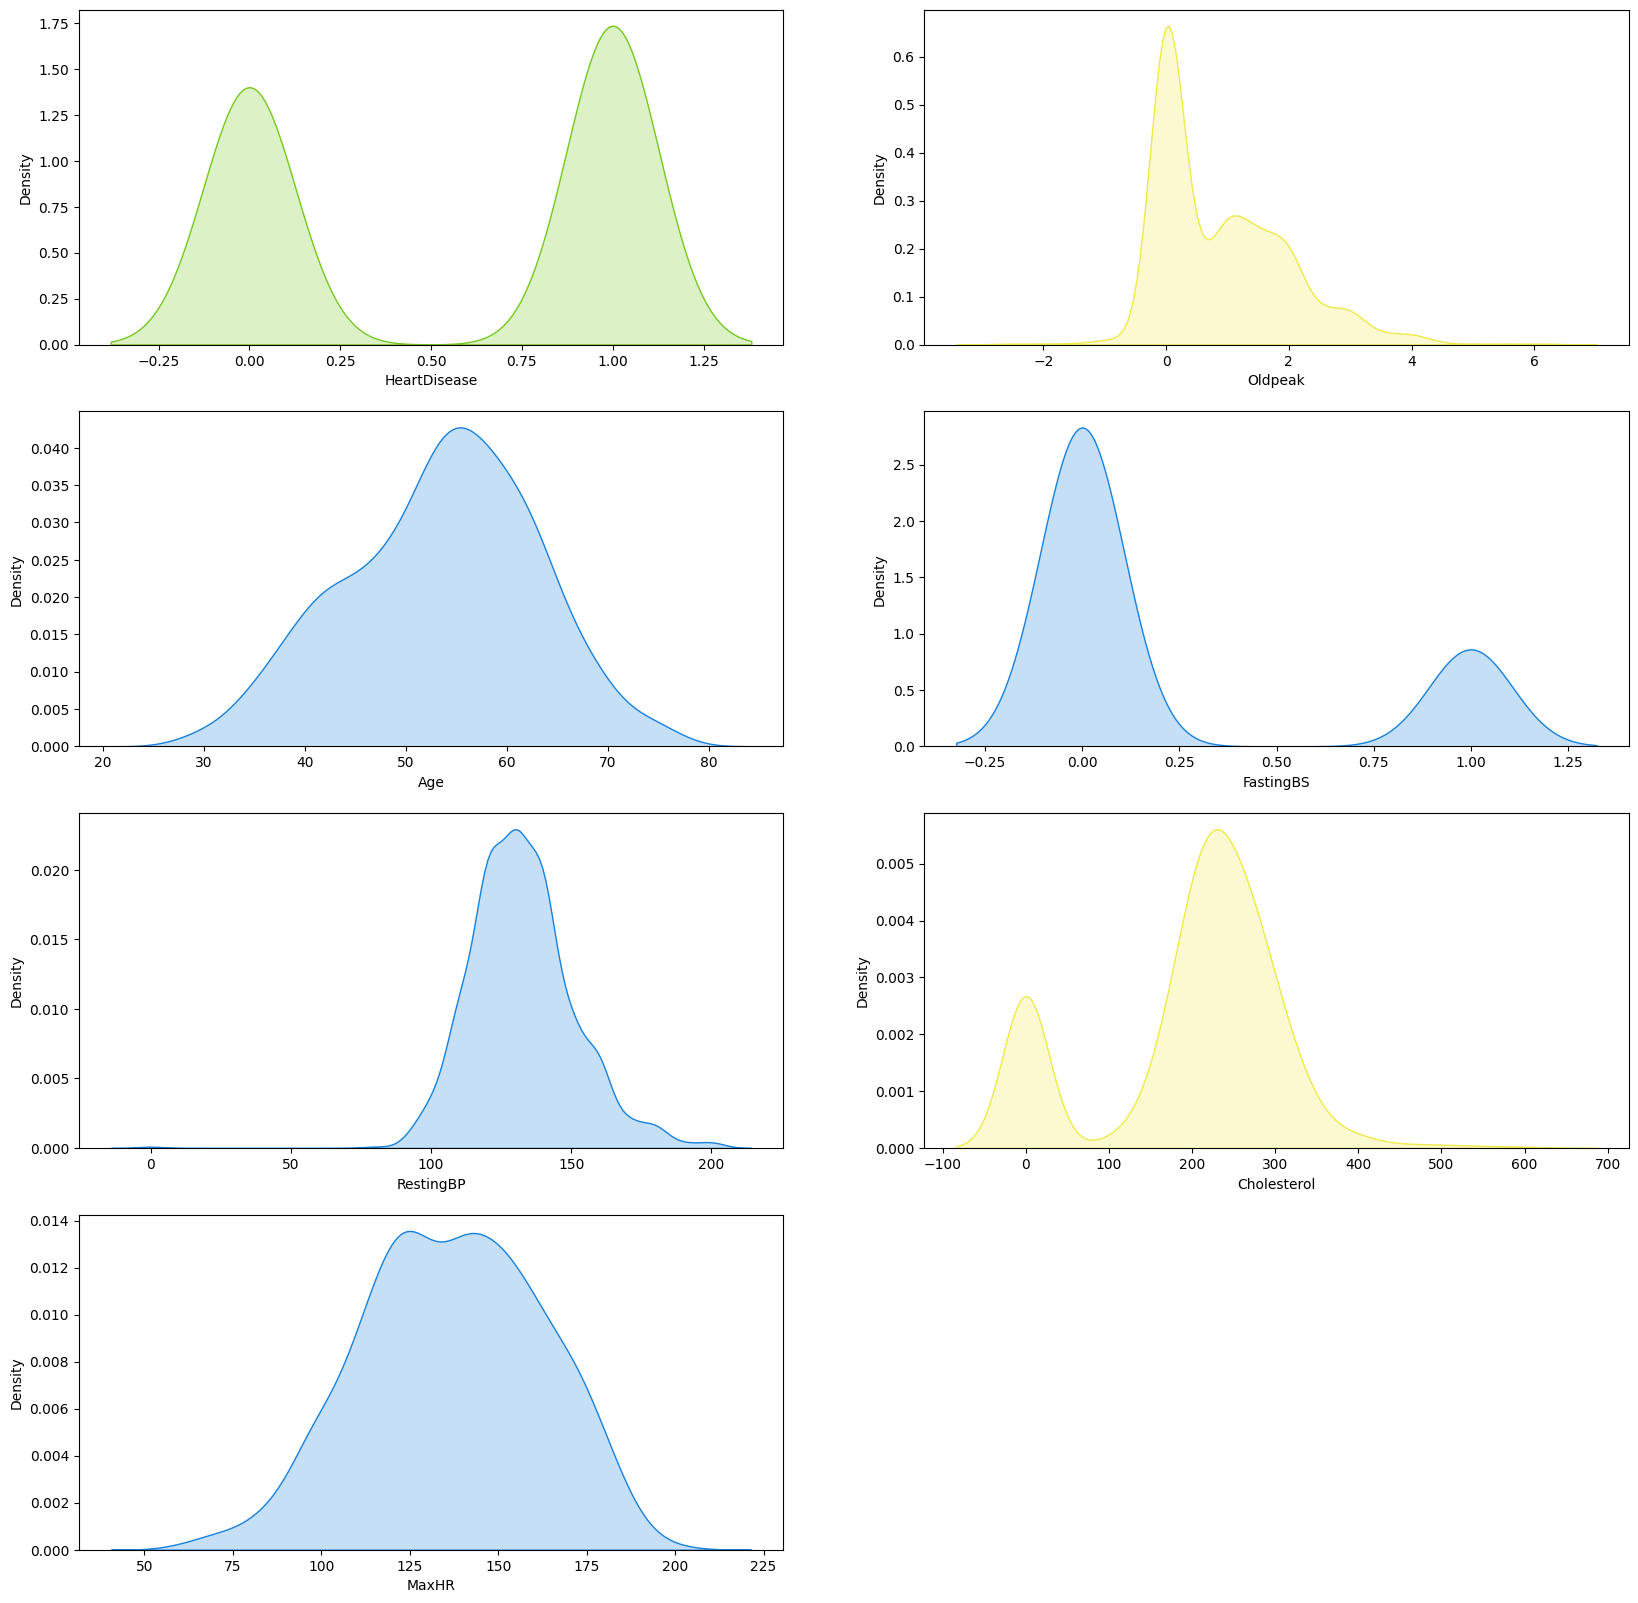

In [32]:
#Plotting the distributions of the numerical variables
color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc']

fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.kdeplot(df['HeartDisease'],color=np.random.choice(color_plot), ax=ax[0][0], shade=True)
sns.kdeplot(df['Oldpeak'],color=np.random.choice(color_plot), ax=ax[0][1], shade=True)
sns.kdeplot(df['Age'],color=np.random.choice(color_plot), ax=ax[1][0], shade=True)
sns.kdeplot(df['FastingBS'],color=np.random.choice(color_plot), ax=ax[1][1], shade=True)
sns.kdeplot(df['RestingBP'],color=np.random.choice(color_plot), ax=ax[2][0],shade=True)
sns.kdeplot(df['Cholesterol'],color=np.random.choice(color_plot), ax=ax[2][1], shade=True)
sns.kdeplot(df['MaxHR'],color=np.random.choice(color_plot), ax=ax[3][0],shade=True)
fig.delaxes(ax[3][1])


In [33]:
#Encoding the features using get dummies method
df=pd.get_dummies(df)

# Building the model

In [34]:
#Preparing the dataset for training
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

In [35]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [36]:
#Scaling the features using pipeline
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

# Support Vector Classifier(with default parameters)

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

![](https://blog.paperspace.com/content/images/2020/03/svm.png)

In [58]:
#Fitting the model on SVC with default parameters
model_svc = SVC(C=100,kernel='rbf', gamma=12)
model_svc.fit(scaled_X_train,y_train)

SVC(C=100, gamma=12)

#### Checking the default parameters in an SVC

In [59]:
model_svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 12,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [60]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(scaled_X_test)
accuracy_score(y_test,pred_svc)

0.5615942028985508

In [56]:
#Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71       125
           1       0.74      0.93      0.82       151

    accuracy                           0.78       276
   macro avg       0.81      0.77      0.77       276
weighted avg       0.80      0.78      0.77       276



#### We get an accuracy of 88.4% without tuning the hyperparameters. So let's try tuning the hyperparameters and check if it improves our accuracy

# Hyperparameter Tuning with GridSearchCV

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [61]:
#Hyperparamter tuning using Gridsearch
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [62]:
#Fitting the model
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [63]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(scaled_X_test)
accuracy_score(y_test,grid_svc)

0.8913043478260869

In [64]:
#Classification report for the tuned model
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.90      0.91      0.90       151

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



#### We get an accuracy of 89.13% with hyperparameter tuning, accounting for 0.7% increase in accuracy

# Best Parameters

In [65]:

print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### The best parameters in this model is:
#### C=100 , gamma = 0.001, kernel: rbf